<a href="https://colab.research.google.com/github/Kogula04/MyFirstgit/blob/master/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.autonotebook import tqdm
import numpy as np
import pandas as pd
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,SGD
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from keras.layers import Lambda,Input,GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [4]:
#Check for GPU
print("GPU","available (YES!!!!)"if tf.config.list_physical_devices("GPU") else "not available :(")
tf.config.list_physical_devices("GPU")

GPU available (YES!!!!)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#reading labels csv file
labels = pd.read_csv('drive/MyDrive/Dataset/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,bbc6ea23db33da6d67f5b4ad9fcce758,scottish_deerhound
freq,1,126


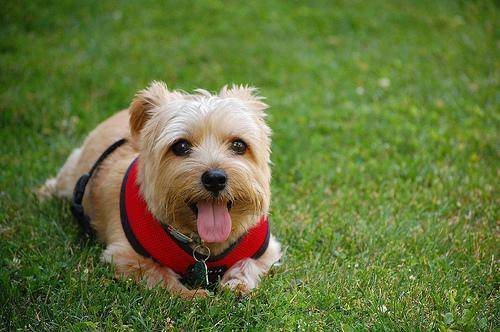

In [7]:
#check one image
from IPython.display import display,Image
Image("../content/drive/MyDrive/Dataset/train/0075dc49dab4024d12fafe67074d8a81.jpg")

In [8]:
import os
if len(os.listdir('/content/drive/MyDrive/Dataset/train')) == len(labels['id']):
  print("Number of file matches of actual images!")
else:
  print("Number of file does not matches number of actual images!!")


Number of file does not matches number of actual images!!


In [9]:
#create list of alphabetical sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))

#Map each label string to an integer label.
class_to_num = dir(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [14]:
input_shape = (331,331,3)
def images_to_array(directory, label_dataframe,target_size = input_shape):
  image_labels = label_dataframe['breed']
  imaages = np.zeros([len(label_dataframe),target_size[0], target_size[1], target_size[2]], dtype=np.uint8)
  y = np.zeros([len(label_dataframe),1],dtype=np.uint8)

  for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
    img_dir = os.path.join(directory, image_name +'.jpg')
    img = load_img(img_dir, target_size= target_size)
    images[ix] = img
    del img
    dog_breed = image_labels[ix]
    y[ix] = class_to_num[dog_breed]
  y = to_categorial(y)
  return images,y

In [15]:
import time
t = time.time()
x,y = images_to_array('/content/drive/MyDrive/Dataset/train',labels[:])
print('runtime in seconds: {}'.format(time.time() - t))

NameError: ignored